In [98]:
import pandas as pd
import pickle
from scipy import stats
import pandas as pd
import seaborn as sns
import pingouin as pg
import statsmodels.formula.api as s
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [99]:
final = pickle.load(open( '../00_data/final/competence_onlyBaseline_firstSentences.pkl','rb') )

In [100]:
final

,UserID,ability,interventiongroup,Geschlecht,Klassenstufe
0,186923,-1.06917,6,m,9
1,360974,0.53027,2,w,10
2,373836,3.75596,2,w,6
3,435839,2.63559,control,w,8
4,452752,2.11162,5,w,8
...,...,...,...,...,...
11164,1063303,0.97849,4,d,10
11165,1063461,-0.07219,6,m,11
11166,1063470,-0.97366,2,w,11
11167,1063762,1.01398,NaN,NaN,NaN


In [101]:
intvcontrol = final[(final['interventiongroup']=='control')]
intv2 = final[(final['interventiongroup']=='2')]
intv3 = final[(final['interventiongroup']=='3')]
intv4 = final[(final['interventiongroup']=='4')]
intv5 = final[(final['interventiongroup']=='5')]
intv6 = final[(final['interventiongroup']=='6')]

Check assumptions

In [102]:
# Levenes homogeneity => homogeneity = not significant // significant = no homogeneity 
stats.levene(intvcontrol['ability'], intv2['ability'], intv3['ability'], intv4['ability'], intv5['ability'], intv6['ability'])

LeveneResult(statistic=0.46465528285451424, pvalue=0.8028317796994692)

In [103]:
# Shapiro-Wilk test for normality => normality = not significant // significant = no normality 
print(stats.shapiro(intvcontrol['ability']))
print(stats.shapiro(intv2['ability']))
print(stats.shapiro(intv3['ability']))
print(stats.shapiro(intv4['ability']))
print(stats.shapiro(intv5['ability']))
print(stats.shapiro(intv6['ability']))

ShapiroResult(statistic=0.985084593296051, pvalue=4.674724013919648e-15)
ShapiroResult(statistic=0.9895131587982178, pvalue=6.170537414362798e-10)
ShapiroResult(statistic=0.9853017330169678, pvalue=7.977334613197551e-13)
ShapiroResult(statistic=0.9904030561447144, pvalue=1.3387039254908473e-09)
ShapiroResult(statistic=0.986544668674469, pvalue=2.7508356703620507e-11)
ShapiroResult(statistic=0.9886510372161865, pvalue=4.234987083240327e-10)


<AxesSubplot:xlabel='ability', ylabel='Count'>

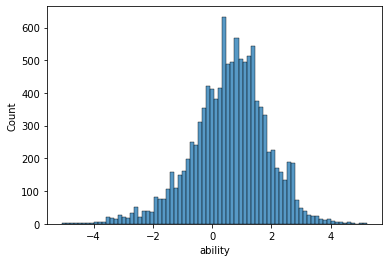

In [104]:
sns.histplot(data=final, x="ability")

In [105]:
# # Fit and summarize ols model
# model = ols('ability ~ C(interventiongroup)+C(Geschlecht)+C(interventiongroup):C(Geschlecht)',data=final).fit()
# # type-1 anova summary 
# table_type_1 = sm.stats.anova_lm(model, typ=1)

# # type-2 anova summary
# table_type_2 = sm.stats.anova_lm(model, typ=2)
# table_type_1

In [106]:
# aov = pg.anova(data=final, dv='ability', between=['interventiongroup'], detailed=True)
# print(aov)


Übersicht Effektgroeßen

In [107]:
ability_by_group = final.groupby(['interventiongroup']).agg({'ability':'mean','Geschlecht':'count'})
ability_by_group = ability_by_group.rename(columns={'Geschlecht':'count'})
ability_by_group

,ability,count
interventiongroup,,
2,0.639140,1752
3,0.621276,1847
4,0.577251,1822
5,0.588573,1652
6,0.570049,1658
control,0.571060,2370


In [108]:
ability_by_group = final.groupby(['Geschlecht','interventiongroup']).agg({'ability':'median','Klassenstufe':'count'})
ability_by_group = ability_by_group.rename(columns={'Klassenstufe':'count'})

ability_by_group

ability  count
Geschlecht interventiongroup                 
d          2                  0.975640     47
           3                  0.720850     61
           4                  0.453640     53
           5                  0.555630     54
           6                  0.112505     68
           control            0.285360     73
m          2                  0.638600    814
           3                  0.715450    839
           4                  0.617080    890
           5                  0.638960    782
           6                  0.542685    792
           control            0.567770   1122
w          2                  0.724650    891
           3                  0.668160    947
           4                  0.644180    879
           5                  0.708000    816
           6                  0.793815    798
           control            0.726510   1175

In [109]:
ability_by_group = final.groupby(['Klassenstufe','interventiongroup']).agg({'ability':'median','Geschlecht':'count'})
ability_by_group = ability_by_group.rename(columns={'Geschlecht':'count'})

ability_by_group

ability  count
Klassenstufe interventiongroup                 
10           2                  1.059100    171
             3                  0.955270    181
             4                  1.033320    169
             5                  0.950615    156
             6                  0.807275    158
             control            0.779500    208
11           2                  0.917710    159
             3                  0.652000    169
             4                  0.745650    160
             5                  0.783180    143
             6                  0.944320    144
             control            0.748870    200
12           2                  0.841270     55
             3                  1.261670     49
             4                  1.104565     40
             5                  1.261790     53
             6                  1.436265     44
             control            1.116105     58
13           2                  1.616570     31
             3                  1.505745     24
             4                  1.218930     31
             5                  1.206960     26
             6                  1.590185     32
             control            1.039620     43
5            2                  0.224505    180
             3                  0.406700    181
             4                  0.348765    194
             5                  0.303610    149
             6                  0.269960    177
             control            0.048960    243
6            2                  0.489560    267
             3                  0.449850    268
             4                  0.475480    284
             5                  0.494695    240
             6                  0.426710    241
             control            0.493465    338
7            2                  0.556010    245
             3                  0.534025    274
             4                  0.531700    328
             5                  0.470180    293
             6                  0.407955    276
             control            0.635185    422
8            2                  0.658980    331
             3                  0.698820    378
             4                  0.560485    332
             5                  0.718550    290
             6                  0.704685    306
             control            0.626360    455
9            2                  0.863180    313
             3                  0.842970    323
             4                  0.765840    284
             5                  0.762410    302
             6                  0.733445    280
             control            0.894760    403

Alle Daten

In [110]:
# Kruskal Wallis Test 
stats.kruskal(intvcontrol['ability'], intv2['ability'], intv3['ability'],intv4['ability'],intv5['ability'],intv6['ability'])


KruskalResult(statistic=5.00967827396081, pvalue=0.4147001792343346)

In [111]:
#Wilcoxon Mann Whitney Test
print(stats.mannwhitneyu(intvcontrol['ability'], intv2['ability']))
print(stats.mannwhitneyu(intvcontrol['ability'], intv3['ability']))
print(stats.mannwhitneyu(intvcontrol['ability'], intv4['ability']))
print(stats.mannwhitneyu(intvcontrol['ability'], intv5['ability']))
print(stats.mannwhitneyu(intvcontrol['ability'], intv6['ability']))


MannwhitneyuResult(statistic=2018581.5, pvalue=0.12767291356820834)
MannwhitneyuResult(statistic=2134032.0, pvalue=0.1634565666618849)
MannwhitneyuResult(statistic=2165565.5, pvalue=0.8672057230287806)
MannwhitneyuResult(statistic=1941411.5, pvalue=0.6546085188605077)
MannwhitneyuResult(statistic=1964734.0, pvalue=0.9999231163618805)


<AxesSubplot:xlabel='ability', ylabel='interventiongroup'>

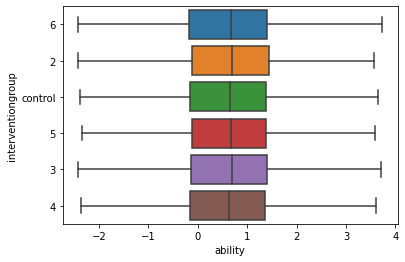

In [112]:
sns.boxplot(data=final, x="ability", y="interventiongroup",showfliers = False)#,hue='Geschlecht'


<AxesSubplot:xlabel='ability', ylabel='Geschlecht'>

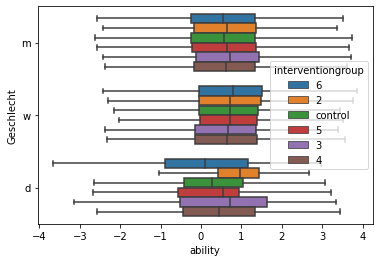

In [113]:
sns.boxplot(data=final, x="ability", hue="interventiongroup",y='Geschlecht',showfliers = False)


Gender Demographics

In [114]:
final_m = final.loc[final.Geschlecht == 'm']
final_w = final.loc[final.Geschlecht == 'w']
final_d = final.loc[final.Geschlecht == 'd']

Jungen

In [115]:
intvcontrol_m = final_m[(final_m['interventiongroup']=='control')]
intv2_m = final_m[(final_m['interventiongroup']=='2')]
intv3_m = final_m[(final_m['interventiongroup']=='3')]
intv4_m = final_m[(final_m['interventiongroup']=='4')]
intv5_m = final_m[(final_m['interventiongroup']=='5')]
intv6_m = final_m[(final_m['interventiongroup']=='6')]

# Kruskal Wallis Test 
stats.kruskal(intvcontrol_m['ability'], intv2_m['ability'], intv3_m['ability'],intv4_m['ability'],intv5_m['ability'],intv6_m['ability'])



KruskalResult(statistic=9.012604495974214, pvalue=0.1085624619322569)

In [116]:
#Wilcoxon Mann Whitney Test
print(stats.mannwhitneyu(intvcontrol_m['ability'], intv2_m['ability']))
print(stats.mannwhitneyu(intvcontrol_m['ability'], intv3_m['ability']))
print(stats.mannwhitneyu(intvcontrol_m['ability'], intv4_m['ability']))
print(stats.mannwhitneyu(intvcontrol_m['ability'], intv5_m['ability']))
print(stats.mannwhitneyu(intvcontrol_m['ability'], intv6_m['ability']))


MannwhitneyuResult(statistic=446727.5, pvalue=0.41363850343433695)
MannwhitneyuResult(statistic=439206.5, pvalue=0.011186689825014098)
MannwhitneyuResult(statistic=491096.5, pvalue=0.5267176003489509)
MannwhitneyuResult(statistic=429952.0, pvalue=0.45847744710421)
MannwhitneyuResult(statistic=448374.0, pvalue=0.7330564897919369)


<AxesSubplot:xlabel='ability', ylabel='interventiongroup'>

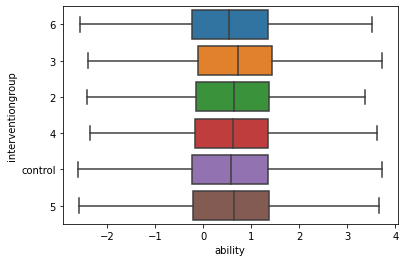

In [117]:
sns.boxplot(data=final_m, x="ability", y="interventiongroup",showfliers = False)


Maedchen

In [118]:
intvcontrol_w = final_w[(final_w['interventiongroup']=='control')]
intv2_w = final_w[(final_w['interventiongroup']=='2')]
intv3_w = final_w[(final_w['interventiongroup']=='3')]
intv4_w = final_w[(final_w['interventiongroup']=='4')]
intv5_w = final_w[(final_w['interventiongroup']=='5')]
intv6_w = final_w[(final_w['interventiongroup']=='6')]

# Kruskal Wallis Test 
stats.kruskal(intvcontrol_w['ability'], intv2_w['ability'], intv3_w['ability'],intv4_w['ability'],intv5_w['ability'],intv6_w['ability'])


KruskalResult(statistic=4.859403570703839, pvalue=0.4332787970101357)

In [119]:
#Wilcoxon Mann Whitney Test
print(stats.mannwhitneyu(intvcontrol_w['ability'], intv2_w['ability']))
print(stats.mannwhitneyu(intvcontrol_w['ability'], intv3_w['ability']))
print(stats.mannwhitneyu(intvcontrol_w['ability'], intv4_w['ability']))
print(stats.mannwhitneyu(intvcontrol_w['ability'], intv5_w['ability']))
print(stats.mannwhitneyu(intvcontrol_w['ability'], intv6_w['ability']))


MannwhitneyuResult(statistic=512832.0, pvalue=0.4286042478838792)
MannwhitneyuResult(statistic=568205.0, pvalue=0.39866443101970495)
MannwhitneyuResult(statistic=528328.5, pvalue=0.37027927460401355)
MannwhitneyuResult(statistic=480885.0, pvalue=0.906329859835964)
MannwhitneyuResult(statistic=458485.0, pvalue=0.40511346159503103)


<AxesSubplot:xlabel='ability', ylabel='interventiongroup'>

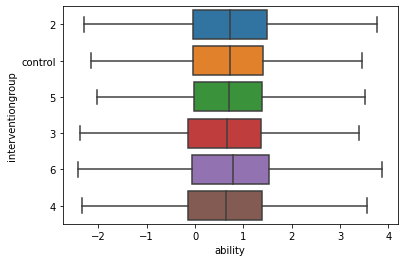

In [120]:
sns.boxplot(data=final_w, x="ability", y="interventiongroup",showfliers = False)

Divers

In [121]:
intvcontrol_d = final_d[(final_d['interventiongroup']=='control')]
intv2_d = final_d[(final_d['interventiongroup']=='2')]
intv3_d = final_d[(final_d['interventiongroup']=='3')]
intv4_d = final_d[(final_d['interventiongroup']=='4')]
intv5_d = final_d[(final_d['interventiongroup']=='5')]
intv6_d = final_d[(final_d['interventiongroup']=='6')]

# Kruskal Wallis Test 
stats.kruskal(intvcontrol_d['ability'], intv2_d['ability'], intv3_d['ability'],intv4_d['ability'],intv5_d['ability'],intv6_d['ability'])


KruskalResult(statistic=8.583677453972061, pvalue=0.126867194130068)

In [122]:
#Wilcoxon Mann Whitney Test
print(stats.mannwhitneyu(intvcontrol_d['ability'], intv2_d['ability']))
print(stats.mannwhitneyu(intvcontrol_d['ability'], intv3_d['ability']))
print(stats.mannwhitneyu(intvcontrol_d['ability'], intv4_d['ability']))
print(stats.mannwhitneyu(intvcontrol_d['ability'], intv5_d['ability']))
print(stats.mannwhitneyu(intvcontrol_d['ability'], intv6_d['ability']))


MannwhitneyuResult(statistic=1304.5, pvalue=0.027313821738037168)
MannwhitneyuResult(statistic=1989.0, pvalue=0.2896531479616594)
MannwhitneyuResult(statistic=1878.0, pvalue=0.7819754761899486)
MannwhitneyuResult(statistic=1972.5, pvalue=0.9961089545437248)
MannwhitneyuResult(statistic=2698.0, pvalue=0.37391836039930315)


<AxesSubplot:xlabel='ability', ylabel='interventiongroup'>

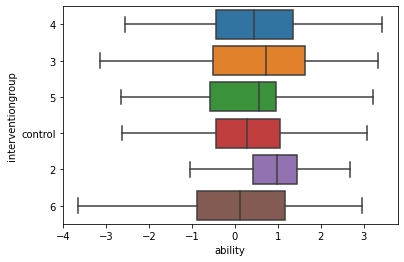

In [123]:
sns.boxplot(data=final_d, x="ability", y="interventiongroup",showfliers = False)

Demographics Klassenstufe